<a href="https://colab.research.google.com/github/0xrocky/master-thesis/blob/main/info_real_traces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generic imports
!pip install ipympl
from google.colab import drive
from google.colab import output
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
# Load traces from the GDrive folder
LOCAL_DRIVE = '/content/drive'
drive.mount( LOCAL_DRIVE, force_remount=True )

# CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B0-2021-11-19-16.54-cycles.npy'
# TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B0-2021-11-19-16.54-traces.npy'
# CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B1-2021-11-24-12.55-cycles.npy'
# TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B1-2021-11-24-12.55-traces.npy'
# CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B2-2021-11-24-13.03-cycles.npy'
# TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B2-2021-11-24-13.03-traces.npy'
# CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B3-2021-11-24-13.08-cycles.npy'
# TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B3-2021-11-24-13.08-traces.npy'
CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B4-2021-11-24-13.13-cycles.npy'
TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B4-2021-11-24-13.13-traces.npy'
#CYCLES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B5-2021-11-22-16.44-cycles.npy'
#TRACES_FILE = '/content/drive/MyDrive/ECCML/RealTraces/B5-2021-11-22-16.44-traces.npy'

traces = np.load( TRACES_FILE, allow_pickle=True )
cycles = np.load( CYCLES_FILE, allow_pickle=True )

Mounted at /content/drive


In [ ]:
print( traces[ 0 ][ :5 ] )
traces = np.multiply( traces, 175 )
print( traces[ 0 ][ :5 ] )
print( "SAMPLES: min, max, mean:", np.min( traces ), np.max( traces ), np.mean( traces ) )
#traces = np.add( traces, 20 )

[ 0.00488281 -0.02832031  0.02441406  0.00976562  0.00878906]
[ 0.85449219 -4.95605469  4.27246094  1.70898438  1.53808594]
SAMPLES: min, max, mean: -15.8935546875 17.9443359375 0.8111033129882812


In [ ]:
# Stampo le dimensionalità dei due array delle tracce e dei cicli di clock
print( "ndim traces: ", np.ndim( traces ) )
print( "shape traces: ", np.shape( traces ) )
print( "size traces: ", np.size( traces ) )
print( "len traces: ", len( traces ) )
print( "len traces[ 0 ]: ", len( traces[ 0 ] ) )
print( "min value:", np.min( traces[ 0 ] ) )
print( "max value:", np.max( traces[ 0 ] ) )
print( traces[0][ :30 ] )

print( "ndim cycles: ", np.ndim( cycles ) )
print( "shape cycles: ", np.shape( cycles ) )
print( "size cycles: ", np.size( cycles ) )
print( "len cycles: ", len( cycles ) )
print( "len cycles[ 0 ]: ", len( cycles[ 0 ] ) )
print( cycles[0][ -1 ] )
print( cycles[0][ :150 ] )

ndim traces:  2
shape traces:  (1, 10000000)
size traces:  10000000
len traces:  1
len traces[ 0 ]:  10000000
min value: -15.8935546875
max value: 17.9443359375
[ 0.85449219 -4.95605469  4.27246094  1.70898438  1.53808594  1.87988281
  0.17089844  0.         -5.12695312  3.75976562  2.05078125  0.51269531
  1.87988281  0.17089844 -4.61425781  3.75976562  2.22167969  1.87988281
  0.68359375  0.17089844 -1.3671875   4.61425781  2.05078125  0.
  1.53808594  0.68359375 -0.68359375  0.68359375  1.02539062  3.58886719]
ndim cycles:  3
shape cycles:  (1, 6114, 2)
size cycles:  12228
len cycles:  1
len cycles[ 0 ]:  6114
[    132 7027212]
[[     1     26]
 [     2     79]
 [     4    161]
 [     7    320]
 [     6   3118]
 [     6   5901]
 [     5   8588]
 [     4   8835]
 [     4   9078]
 [     6   9238]
 [     5  12026]
 [     7  12252]
 [     4  15040]
 [     4  15288]
 [     6  15536]
 [     4  18344]
 [     7  18593]
 [     4  21263]
 [     4  21417]
 [     6  21574]
 [     4  24233]
 [  

In [ ]:
# Per mia comodità costruisco delle funzioni per ottenere un sample, un tag, i cicli di clock
def get_trace_sample( i ):
  return traces[ 0 ][ i ]

def get_cycles_tag( i ):
  return cycles[ 0 ][ i ][ 0 ]

def get_cycles_clock( i ):
  return cycles[ 0 ][ i ][ 1 ]

def len_trace_samples():
  return len( traces[ 0 ] )

def len_cycles():
  return len( cycles[ 0 ] )

In [ ]:
# Conto quante occorrenze di operazioni ho in base ai tag
uno = due = tre = quattro = cinque = sei = sette = centotrentuno = centotrentadue = 0
for i in range( len_cycles() ):
  temp = get_cycles_tag( i )
  if temp == 1:
    uno += 1
  elif temp == 2:
    due += 1
  elif temp == 3:
    tre += 1
  elif temp == 4:
    quattro += 1
  elif temp == 5:
    cinque += 1
  elif temp == 6:
    sei += 1
  elif temp == 7:
    sette += 1
  elif temp == 131:
    centotrentuno += 1
  elif temp == 132:
    centotrentadue += 1

print( "test_bit:", uno )
print( "XYcZ_ADDC:", due )
print( "XYcZ_ADD:", tre )
print( "SUB:", quattro )
print( "ADD:", cinque )
print( "MUL:", sei )
print( "SQR:", sette )
print( "XYcZ_ADD end:", centotrentuno )
print( "vli_set:", centotrentadue )

if uno + due + tre + quattro + cinque + sei + sette + centotrentuno + centotrentadue == len_cycles():
  print( "i conti tornano!" )
else:
  print( "qualcosa non quadra!" )

print( "quanti cicli di clock sono stati registrati:", get_cycles_clock( -1 ) )

test_bit: 160
XYcZ_ADDC: 160
XYcZ_ADD: 160
SUB: 2576
ADD: 322
MUL: 1449
SQR: 805
XYcZ_ADD end: 160
vli_set: 322
i conti tornano!
quanti cicli di clock sono stati registrati: 7027212


In [ ]:
# Per mia comodità separo in due array distinti i cicli di clock e i tag delle singole operazioni
operation_time = []

for i in range( len_cycles() - 1 ):
  duration = get_cycles_clock( i + 1 ) - get_cycles_clock( i )
  operation_time += [ get_cycles_tag( i ) ] * duration

In [ ]:
# Minimo, massimo e media
mults = []
adds = []
subs = []
sqrs = []
testbits = []
xyzadds = []
xyzends = []
xyzaddcs = []
vlisets = []

for i in range( len_cycles() - 1 ):
  temp = get_cycles_tag( i )
  curr_op_duration = get_cycles_clock( i + 1 ) - get_cycles_clock( i )
  if get_cycles_clock( i ) + curr_op_duration > len( traces[ 0 ] ):  # il numero di samples è 10mln, ma il numero di cicli di clock registrati è maggiore
    print( i, "break" )
    break
  if temp == 1:
    testbits += [ curr_op_duration ]
  elif temp == 2:
    xyzaddcs += [ curr_op_duration ]
  elif temp == 3:
    xyzadds += [ curr_op_duration ]
  elif temp == 4:
    subs += [ curr_op_duration ]
  elif temp == 5:
    adds += [ curr_op_duration ]
  elif temp == 6:
    mults += [ curr_op_duration ]
  elif temp == 7:
    sqrs += [ curr_op_duration ]
  elif temp == 131:
    xyzends += [ curr_op_duration ]
  else:
    vlisets += [ curr_op_duration ]

print( "SUB: min, max, mean, #samples:", np.min( subs ), np.max( subs ), np.mean( subs ), quattro*np.mean( subs ) )
print( "ADD: min, max, mean, #samples:", np.min( adds ), np.max( adds ), np.mean( adds ), cinque*np.mean( adds ) )
print( "MUL: min, max, mean, #samples:", np.min( mults ), np.max( mults ), np.mean( mults ), sei*np.mean( mults ) )
print( "SQR: min, max, mean, #samples:", np.min( sqrs ), np.max( sqrs ), np.mean( sqrs ), sette*np.mean( sqrs ) )
print( "TEST BIT: min, max, mean, #samples:", np.min( testbits ), np.max( testbits ), np.mean( testbits ), uno*np.mean( testbits ) )
print( "XYZADDC: min, max, mean, #samples:", np.min( xyzaddcs ), np.max( xyzaddcs ), np.mean( xyzaddcs ), due*np.mean( xyzaddcs ) )
print( "XYZADD: min, max, mean, #samples:", np.min( xyzadds ), np.max( xyzadds ), np.mean( xyzadds ), tre*np.mean( xyzadds ) )
print( "XYZENDS: min, max, mean, #samples:", np.min( xyzends ), np.max( xyzends ), np.mean( xyzends ), centotrentuno*np.mean( xyzends ) )
print( "VLISET: min, max, mean, #samples:", np.min( vlisets ), np.max( vlisets ), np.mean( vlisets ), centotrentadue*np.mean( vlisets ) )

#mults = []
#adds = []
#subs = []
samples = 10000

SUB: min, max, mean, #samples: 153 255 203.51203416149067 524247.0
ADD: min, max, mean, #samples: 218 255 236.0496894409938 76008.0
MUL: min, max, mean, #samples: 2659 2813 2729.1739130434785 3954573.0000000005
SQR: min, max, mean, #samples: 2666 2828 2739.726708074534 2205480.0
TEST BIT: min, max, mean, #samples: 53 53 53.0 8480.0
XYZADDC: min, max, mean, #samples: 82 82 82.0 13120.0
XYZADD: min, max, mean, #samples: 65 65 65.0 10400.0
XYZENDS: min, max, mean, #samples: 37 167 37.8125 6050.0
VLISET: min, max, mean, #samples: 175 172428 712.8598130841121 229540.8598130841


In [ ]:
print( subs )
print( np.sum( subs ) )

[159, 243, 160, 248, 248, 249, 154, 157, 255, 248, 248, 246, 160, 252, 247, 245, 159, 244, 250, 158, 157, 160, 243, 247, 165, 159, 249, 155, 160, 253, 246, 156, 249, 153, 160, 248, 158, 159, 154, 247, 165, 248, 248, 246, 160, 252, 157, 245, 159, 244, 160, 248, 247, 250, 243, 247, 255, 249, 159, 155, 160, 253, 156, 246, 249, 153, 250, 158, 158, 249, 154, 247, 165, 248, 248, 246, 160, 252, 247, 245, 249, 154, 160, 248, 247, 160, 243, 157, 165, 159, 249, 155, 160, 163, 246, 156, 159, 153, 250, 248, 158, 249, 244, 157, 255, 158, 248, 246, 250, 162, 157, 245, 159, 154, 160, 158, 247, 250, 153, 247, 255, 249, 249, 155, 160, 163, 156, 156, 159, 153, 160, 248, 248, 159, 244, 157, 165, 248, 158, 156, 160, 252, 157, 245, 159, 154, 250, 158, 157, 250, 243, 247, 255, 159, 159, 155, 250, 253, 246, 246, 249, 243, 250, 248, 158, 249, 154, 247, 255, 248, 248, 246, 250, 252, 247, 245, 249, 244, 160, 248, 247, 250, 153, 157, 165, 249, 249, 155, 160, 253, 156, 246, 249, 153, 250, 248, 158, 249, 244, 157,

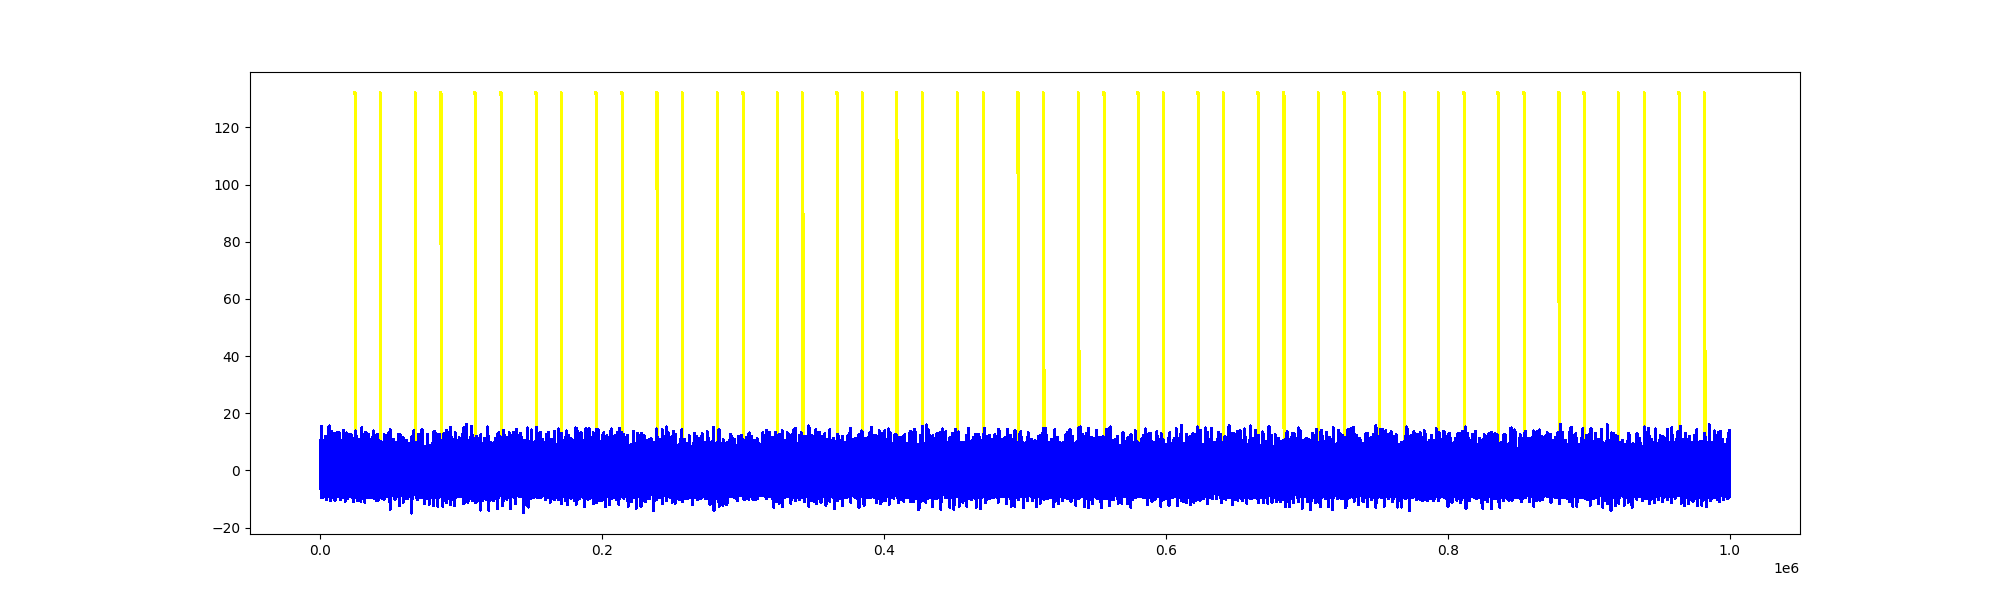

In [ ]:
%matplotlib widget
output.enable_custom_widget_manager()
start = 0
end = 1000000
plt.ion()
plt.rcParams['figure.figsize'] = [ 20, 6 ]
#plt.rcParams["figure.dpi"] = 150
x = np.arange( start, end )
y = np.array( operation_time[ start:end ] )

sub = 4
add = 5
mul = 6
sqr = 7
subs = np.ma.masked_not_equal( y, sub )
adds = np.ma.masked_not_equal( y, add )
muls = np.ma.masked_not_equal( y, mul )
sqrs = np.ma.masked_not_equal( y, sqr )
others = np.ma.masked_inside( y, sub, sqr )

fig, ax = plt.subplots()
ax.plot( x, others, 'yellow', x, subs, 'green', x, adds, 'red', x, muls, 'cyan', x, sqrs, 'magenta', antialiased=False )
plt.plot( x, np.array( traces[ 0 ][ start+26:end+26 ] ), color='blue', antialiased=False )
plt.show()
output.disable_custom_widget_manager()